In [439]:
import pandas as pd
import numpy as np

In [440]:
declarations = pd.read_csv('gatorcain_data/declarations_clean_data.csv')

# Get disaster Number

In [441]:
declarations = declarations[declarations['declarationType'] == 'DR']
declarations.set_index('disasterNumber', inplace=True)
declarations['Affected Counties'] = declarations['designatedArea'].str.count(',') + 1
declarations = declarations.drop('declarationType', axis=1)
declarations

,declarationDate,declarationTitle,designatedArea,Affected Counties
disasterNumber,,,,
1539,2004-08-13 00:00:00+00:00,TROPICAL STORM BONNIE AND HURRICANE CHARLEY,"Franklin (County),Wakulla (County),Hendry (Cou...",67
1545,2004-09-04 00:00:00+00:00,HURRICANE FRANCES,"Sarasota (County),Nassau (County),Okeechobee (...",67
1551,2004-09-16 00:00:00+00:00,HURRICANE IVAN,"Jackson (County),Wakulla (County),Washington (...",45
1561,2004-09-26 00:00:00+00:00,HURRICANE JEANNE,"Marion (County),Hernando (County),Palm Beach (...",53
1595,2005-07-10 00:00:00+00:00,HURRICANE DENNIS,"Calhoun (County),Gadsden (County),Wakulla (Cou...",20
1602,2005-08-28 00:00:00+00:00,HURRICANE KATRINA,"Santa Rosa (County),Escambia (County),Miami-Da...",11
1609,2005-10-24 00:00:00+00:00,HURRICANE WILMA,"Brevard (County),Hendry (County),DeSoto (Count...",20
1806,2008-10-27 00:00:00+00:00,HURRICANE GUSTAV,"Santa Rosa (County),Gulf (County),Okaloosa (Co...",6
4084,2012-10-18 00:00:00+00:00,HURRICANE ISAAC,"Escambia (County),St. Lucie (County),Okaloosa ...",12


# Claims ihp sum per county

In [442]:
broward_miami_claims = pd.read_csv('gatorcain_data/broward-miami-claims-clean.csv', usecols=['disasterNumber','county','000damagedCity','damagedZipCode','ihpAmount'])
broward_miami_claims = broward_miami_claims.rename(columns={'000damagedCity': 'damagedCity'})
broward_miami_claims = broward_miami_claims[broward_miami_claims['damagedCity'] != 'South Miami Heights']

frances_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 1545]

# calc sum for broward
broward_frances = frances_claims[frances_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_frances = frances_claims[frances_claims['county'] != 'Broward (County)']

print(broward_frances['ihpAmount'].sum(), miami_frances['ihpAmount'].sum())

wilma_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 1609]

# calc sum for broward
broward_wilma = wilma_claims[wilma_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_wilma = wilma_claims[wilma_claims['county'] != 'Broward (County)']

print(broward_wilma['ihpAmount'].sum(), miami_wilma['ihpAmount'].sum())

irma_claims = broward_miami_claims[broward_miami_claims['disasterNumber'] == 4337]

# calc sum for broward
broward_irma = irma_claims[irma_claims['county'] == 'Broward (County)']
# calc sum for miami
miami_irma = irma_claims[irma_claims['county'] != 'Broward (County)']

print(broward_irma['ihpAmount'].sum(), miami_irma['ihpAmount'].sum())

14339536.620000001 30473870.669999998
117200012.97000003 90167707.74000001
104624976.63999999 201948409.41000006


In [443]:
threshold = 10000

ihp_value_counts = wilma_claims['ihpAmount'].value_counts()

# Get the count of values above the threshold
above_threshold_count = ihp_value_counts[ihp_value_counts.index > threshold].sum()

# Get the total count of values in the column
total_count = ihp_value_counts.sum()

# Calculate the probability of a number being above the threshold
probability = above_threshold_count / total_count

print('Probability of a number being above: ', threshold,' ',  probability*100)

Probability of a number being above:  10000   0.7181388180272109


# Getting The number of claims per city

In [444]:
# irma claims amount
irma_claims_by_city = irma_claims.groupby('damagedCity')['ihpAmount'].sum().reset_index()
irma_claims_by_city = irma_claims_by_city.rename(columns={'ihpAmount': 'irmaIHPTotal'})
irma_claims_by_city = irma_claims_by_city.set_index('damagedCity', drop=True)

# wilma claims amount
wilma_claims_by_city = wilma_claims.groupby('damagedCity')['ihpAmount'].sum().reset_index()
wilma_claims_by_city = wilma_claims_by_city.rename(columns={'ihpAmount': 'wilmaIHPTotal'})
wilma_claims_by_city = wilma_claims_by_city.set_index('damagedCity', drop=True)

# frances claims amount
frances_claims_by_city = frances_claims.groupby('damagedCity')['ihpAmount'].sum().reset_index()
frances_claims_by_city = frances_claims_by_city.rename(columns={'ihpAmount': 'francesIHPTotal'})
frances_claims_by_city = frances_claims_by_city.set_index('damagedCity', drop=True)

In [445]:
frances_claims_by_city

,francesIHPTotal
damagedCity,
Aventura,8267.30
Bay Harbor Islands,1939.60
Coconut Creek,199664.06
Cooper City,43456.57
Coral Gables,26416.73
Coral Springs,463089.65
Dania Beach,250642.33
Davie,481451.07
Deerfield Beach,787161.27


# Get the number of houses in each city and the cost of the houses

In [446]:
dtypes = {
    '2000#': float,
    '2004#': float,
    '2005#': float,
    '2010#': float,
    '2017#': float,
    '2020#': float,
    '2004$': float,
    '2005$': float,
    '2008$': float,
    '2017$': float,
    'TOTAL2004': float,
    'TOTAL2005': float,
    'TOTAL2017': float
}

economic_data = pd.read_csv('gatorcain_data/Places.csv', index_col=0, dtype=str)
economic_data.index = economic_data.index.map(str.title)
economic_data = economic_data.replace(',', '', regex=True)
economic_data = economic_data.replace('\$', '', regex=True)
economic_data = economic_data.rename(
    columns={
        '2004#': 'francesHomes',
        '2005#': 'wilmaHomes',
        '2017#': 'irmaHomes',
        '2004$': 'francesAvgHomeVal',
        '2005$': 'wilmaAvgHomeVal',
        '2017$': 'irmaAvgHomeVal',
        'TOTAL2004': 'francesTotalHomeVal',
        'TOTAL2005': 'wilmaTotalHomeVal',
        'TOTAL2017': 'irmaTotalHomeVal'
    }
)

In [447]:
economic_data.head()

,2000#,francesHomes,wilmaHomes,2010#,irmaHomes,2020#,francesAvgHomeVal,wilmaAvgHomeVal,2008$,irmaAvgHomeVal,francesTotalHomeVal,wilmaTotalHomeVal,irmaTotalHomeVal
Aventura,20020,22460,23070,26120,26364,26469,258395.07,319222.80,344400.00,355200.00,5803553229.30,7364470016.38,9364599360.00
Bal Harbour,3150,3002,2965,2780,3289,3507,527444.06,651607.52,703000.00,1267600.00,1583387055.94,1932016289.34,4169009640.00
Bay Harbor Islands,3103,3141,3151,3199,3253,3276,224857.73,277790.57,299700.00,362300.00,706368070.24,875318096.29,1178525670.00
Coconut Creek,22144,23657,24035,25926,26658,26971,176446.39,223805.12,203700.00,192500.00,4174156931.64,5379156130.89,5131568750.00
Cooper City,9229,9502,9571,9912,11141,11668,322315.67,408826.15,372100.00,378100.00,3062707927.30,3912670645.41,4212487720.00


# Merge the three datasets

In [448]:
df = pd.read_csv('gatorcain_data/claims_by_city.csv', index_col=0)
df.fillna(value=0.0, inplace=True)
df = df.drop(['irmaWind', 'francesWind', 'wilmaWind'], axis=1)
df

,francesHomes,wilmaHomes,irmaHomes,francesAvgHomeVal,wilmaAvgHomeVal,irmaAvgHomeVal,francesTotalHomeVal,wilmaTotalHomeVal,irmaTotalHomeVal,irmaIHPTotal,wilmaIHPTotal,francesIHPTotal
damagedCity,,,,,,,,,,,,
Aventura,22460,23070,26364,258395.07,319222.80,355200.0,5.803553e+09,7.364470e+09,9.364599e+09,6.979082e+05,137532.06,8267.30
Bal Harbour,3002,2965,3289,527444.06,651607.52,1267600.0,1.583387e+09,1.932016e+09,4.169010e+09,6.537294e+04,8868.57,0.00
Bay Harbor Islands,3141,3151,3253,224857.73,277790.57,362300.0,7.063681e+08,8.753181e+08,1.178526e+09,2.455025e+05,52598.09,1939.60
Coconut Creek,23657,24035,26658,176446.39,223805.12,192500.0,4.174157e+09,5.379156e+09,5.131569e+09,1.377086e+06,2726810.80,199664.06
Cooper City,9502,9571,11141,322315.67,408826.15,378100.0,3.062708e+09,3.912671e+09,4.212488e+09,5.580460e+05,930875.08,43456.57
Coral Gables,18816,19058,21387,517765.50,639650.57,846100.0,9.742172e+09,1.219014e+10,1.809588e+10,2.147365e+06,973593.27,26416.73
Coral Springs,42959,43371,47192,300314.01,380919.18,354100.0,1.290107e+10,1.652085e+10,1.671072e+10,4.118365e+06,5073296.95,463089.65
Dania Beach,12793,13273,16165,173538.85,214390.92,194700.0,2.220152e+09,2.845611e+09,3.147364e+09,1.500298e+06,1316641.60,250642.33
Davie,33644,34255,40360,231970.26,294231.77,309600.0,7.804454e+09,1.007876e+10,1.249549e+10,4.904591e+06,10472095.84,481451.07


In [449]:
wind_data = pd.read_csv('gatorcain_data/WIR.csv')
wind_data['damagedCity'] = wind_data['damagedCity'].str.title()
wind_data = wind_data.set_index('damagedCity')
wind_data

,irmaWind,wilmaWind,francesWind
damagedCity,,,
Miami,15.0,7.1,13.0
Fort Lauderdale,12.5,7.7,14.5
Hialeah,15.0,7.1,12.5
Hollywood,13.5,7.7,14.0
Pembroke Pines,13.5,7.7,13.0
Miami Beach,15.0,7.1,13.5
Pompano Beach,12.5,8.7,15.0
Coral Springs,12.5,7.7,16.0
Deerfield Beach,11.5,8.7,17.0


In [450]:
df = df.join(wind_data)
df = df.reset_index(drop=False)

In [451]:
df

,damagedCity,francesHomes,wilmaHomes,irmaHomes,francesAvgHomeVal,wilmaAvgHomeVal,irmaAvgHomeVal,francesTotalHomeVal,wilmaTotalHomeVal,irmaTotalHomeVal,irmaIHPTotal,wilmaIHPTotal,francesIHPTotal,irmaWind,wilmaWind,francesWind
0,Aventura,22460,23070,26364,258395.07,319222.80,355200.0,5.803553e+09,7.364470e+09,9.364599e+09,6.979082e+05,137532.06,8267.30,13.5,7.7,14.0
1,Bal Harbour,3002,2965,3289,527444.06,651607.52,1267600.0,1.583387e+09,1.932016e+09,4.169010e+09,6.537294e+04,8868.57,0.00,13.5,7.7,14.0
2,Bay Harbor Islands,3141,3151,3253,224857.73,277790.57,362300.0,7.063681e+08,8.753181e+08,1.178526e+09,2.455025e+05,52598.09,1939.60,13.5,7.7,14.0
3,Coconut Creek,23657,24035,26658,176446.39,223805.12,192500.0,4.174157e+09,5.379156e+09,5.131569e+09,1.377086e+06,2726810.80,199664.06,12.5,8.7,16.0
4,Cooper City,9502,9571,11141,322315.67,408826.15,378100.0,3.062708e+09,3.912671e+09,4.212488e+09,5.580460e+05,930875.08,43456.57,13.5,7.7,14.0
5,Coral Gables,18816,19058,21387,517765.50,639650.57,846100.0,9.742172e+09,1.219014e+10,1.809588e+10,2.147365e+06,973593.27,26416.73,14.5,8.1,10.0
6,Coral Springs,42959,43371,47192,300314.01,380919.18,354100.0,1.290107e+10,1.652085e+10,1.671072e+10,4.118365e+06,5073296.95,463089.65,12.5,7.7,16.0
7,Dania Beach,12793,13273,16165,173538.85,214390.92,194700.0,2.220152e+09,2.845611e+09,3.147364e+09,1.500298e+06,1316641.60,250642.33,13.5,7.7,14.0
8,Davie,33644,34255,40360,231970.26,294231.77,309600.0,7.804454e+09,1.007876e+10,1.249549e+10,4.904591e+06,10472095.84,481451.07,13.5,7.7,14.0
9,Deerfield Beach,39471,40004,45696,154704.59,196227.76,168600.0,6.106283e+09,7.849895e+09,7.704413e+09,2.590652e+06,3989556.14,787161.27,11.5,8.7,17.0


In [452]:
df['wilmaDamagePercentage'] = df['wilmaIHPTotal'] / df['wilmaTotalHomeVal'] * 100
df['francesDamagePercentage'] = df['francesIHPTotal'] / df['francesTotalHomeVal'] * 100
df['irmaDamagePercentage'] = df['irmaIHPTotal'] / df['irmaTotalHomeVal'] * 100

# Creating graphs with the data

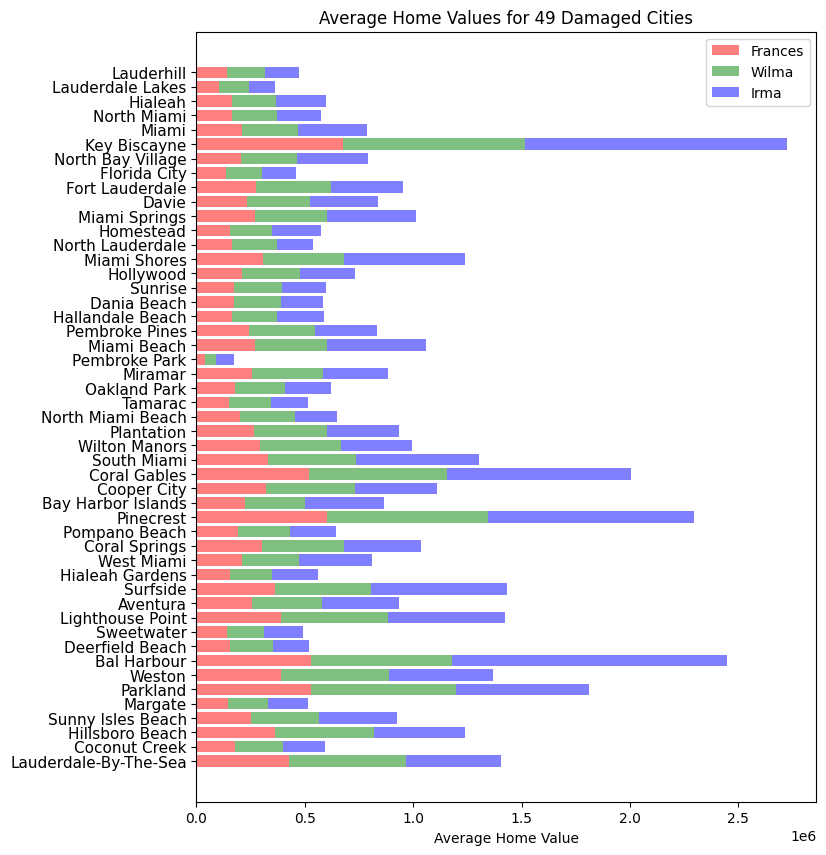

In [465]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 10))

# Set the y-axis to the city names
y_pos = np.arange(len(df['damagedCity']))

# Create a horizontal bar chart for each hurricane
frances = plt.barh(y_pos, df['francesAvgHomeVal'], color='r', alpha=0.5)
wilma = plt.barh(y_pos, df['wilmaAvgHomeVal'], color='g', alpha=0.5, left=df['francesAvgHomeVal'])
irma = plt.barh(y_pos, df['irmaAvgHomeVal'], color='b', alpha=0.5, left=df['francesAvgHomeVal'] + df['wilmaAvgHomeVal'])

# Set the x-axis label
plt.xlabel('Average Home Value')

# Set the y-axis ticks and labels
plt.yticks(y_pos, df['damagedCity'], fontsize=11)

# Add a legend for each hurricane
plt.legend((frances[0], wilma[0], irma[0]), ('Frances', 'Wilma', 'Irma'))

# Add a title to the chart
plt.title('Average Home Values for 49 Damaged Cities')

# Show the plot
plt.show()


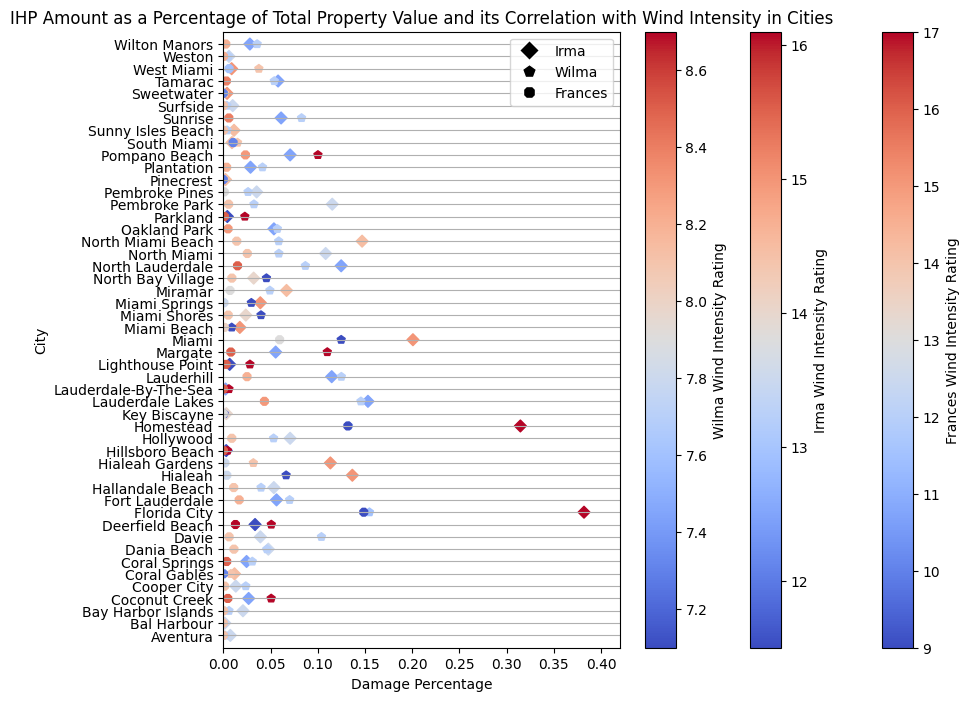

In [454]:


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot for each hurricane
irma = ax.scatter(df['irmaDamagePercentage'], df['damagedCity'], c=df['irmaWind'], cmap='coolwarm', marker='D')
wilma = ax.scatter(df['wilmaDamagePercentage'], df['damagedCity'], c=df['wilmaWind'], cmap='coolwarm', marker='p')
frances = ax.scatter(df['francesDamagePercentage'], df['damagedCity'], c=df['francesWind'], cmap='coolwarm', marker='8')

# Set the x-axis and y-axis limits
ax.set_xlim(0, np.max([df['irmaDamagePercentage'], df['wilmaDamagePercentage'], df['francesDamagePercentage']]) * 1.1)
ax.set_ylim(-1, len(df['damagedCity']))

# Set the x-axis and y-axis labels
ax.set_xlabel('Damage Percentage')
ax.set_ylabel('City')

# Add a title to the chart
ax.set_title('IHP Amount as a Percentage of Total Property Value and its Correlation with Wind Intensity in Cities')

# Add a colorbar to show the wind speed scale
cbar = plt.colorbar(frances, ax=ax)
cbar.set_label('Frances Wind Intensity Rating')

# Add a colorbar to show the wind speed scale
cbar = plt.colorbar(irma, ax=ax)
cbar.set_label('Irma Wind Intensity Rating')

# Add a colorbar to show the wind speed scale
cbar = plt.colorbar(wilma, ax=ax)
cbar.set_label('Wilma Wind Intensity Rating')

# Create legend for hurricanes
legend_elements = [plt.Line2D([0], [0], color='w', label='Irma', markerfacecolor='k', markersize=10, marker='D'),
                   plt.Line2D([0], [0], color='w', label='Wilma', markerfacecolor='k', markersize=10, marker='p'),
                   plt.Line2D([0], [0], color='w', label='Frances', markerfacecolor='k', markersize=10, marker='8')]
ax.legend(handles=legend_elements, loc='upper right')

ax.grid(axis='y')

# Show the plot
plt.show()

# Ranking the cities from worst to best

In [455]:
ranks = pd.read_csv('gatorcain_data/RanksPure.csv', index_col=0)
#ranks = ranks.sort_values('Composite Rank')
ranks

,CompositeRank,HMY
damagedCity,,
Aventura,12,1988
Bal Harbour,8,1977
Bay Harbor Islands,19,1967
Coconut Creek,2,1989
Cooper City,20,1987
Coral Gables,21,1968
Coral Springs,16,1986
Dania Beach,33,1976
Davie,40,1988


In [456]:
df = df.set_index('damagedCity')
df = df.join(ranks)
df

,francesHomes,wilmaHomes,irmaHomes,francesAvgHomeVal,wilmaAvgHomeVal,irmaAvgHomeVal,francesTotalHomeVal,wilmaTotalHomeVal,irmaTotalHomeVal,irmaIHPTotal,wilmaIHPTotal,francesIHPTotal,irmaWind,wilmaWind,francesWind,wilmaDamagePercentage,francesDamagePercentage,irmaDamagePercentage,CompositeRank,HMY
damagedCity,,,,,,,,,,,,,,,,,,,,
Aventura,22460,23070,26364,258395.07,319222.80,355200.0,5.803553e+09,7.364470e+09,9.364599e+09,6.979082e+05,137532.06,8267.30,13.5,7.7,14.0,0.001868,0.000142,0.007453,12,1988
Bal Harbour,3002,2965,3289,527444.06,651607.52,1267600.0,1.583387e+09,1.932016e+09,4.169010e+09,6.537294e+04,8868.57,0.00,13.5,7.7,14.0,0.000459,0.000000,0.001568,8,1977
Bay Harbor Islands,3141,3151,3253,224857.73,277790.57,362300.0,7.063681e+08,8.753181e+08,1.178526e+09,2.455025e+05,52598.09,1939.60,13.5,7.7,14.0,0.006009,0.000275,0.020831,19,1967
Coconut Creek,23657,24035,26658,176446.39,223805.12,192500.0,4.174157e+09,5.379156e+09,5.131569e+09,1.377086e+06,2726810.80,199664.06,12.5,8.7,16.0,0.050692,0.004783,0.026836,2,1989
Cooper City,9502,9571,11141,322315.67,408826.15,378100.0,3.062708e+09,3.912671e+09,4.212488e+09,5.580460e+05,930875.08,43456.57,13.5,7.7,14.0,0.023791,0.001419,0.013247,20,1987
Coral Gables,18816,19058,21387,517765.50,639650.57,846100.0,9.742172e+09,1.219014e+10,1.809588e+10,2.147365e+06,973593.27,26416.73,14.5,8.1,10.0,0.007987,0.000271,0.011867,21,1968
Coral Springs,42959,43371,47192,300314.01,380919.18,354100.0,1.290107e+10,1.652085e+10,1.671072e+10,4.118365e+06,5073296.95,463089.65,12.5,7.7,16.0,0.030708,0.003590,0.024645,16,1986
Dania Beach,12793,13273,16165,173538.85,214390.92,194700.0,2.220152e+09,2.845611e+09,3.147364e+09,1.500298e+06,1316641.60,250642.33,13.5,7.7,14.0,0.046269,0.011289,0.047668,33,1976
Davie,33644,34255,40360,231970.26,294231.77,309600.0,7.804454e+09,1.007876e+10,1.249549e+10,4.904591e+06,10472095.84,481451.07,13.5,7.7,14.0,0.103903,0.006169,0.039251,40,1988


# Correlation between media age and the rankings

In [457]:
# Calculate the sum of the three columns
df['totalAvgHomeVal'] = df['irmaAvgHomeVal'] + df['francesAvgHomeVal'] + df['wilmaAvgHomeVal']

# Calculate the correlation coefficient between the total average home value and the rankings
corr_coef = df['CompositeRank'].corr(df['HMY'])

# Print the correlation coefficient
print(f"Correlation coefficient between total average home value and rankings: {corr_coef}")

Correlation coefficient between total average home value and rankings: -0.15056698688145295


In [462]:
df = df.sort_values('CompositeRank', ascending=True)
df = df.reset_index()
df

,index,damagedCity,francesHomes,wilmaHomes,irmaHomes,francesAvgHomeVal,wilmaAvgHomeVal,irmaAvgHomeVal,francesTotalHomeVal,wilmaTotalHomeVal,...,francesIHPTotal,irmaWind,wilmaWind,francesWind,wilmaDamagePercentage,francesDamagePercentage,irmaDamagePercentage,CompositeRank,HMY,totalAvgHomeVal
0,48,Lauderhill,27208,27593,30069,140412.17,178099.22,154400.0,3.820306e+09,4.914292e+09,...,960097.07,12.5,7.7,14.5,0.124990,0.025131,0.114765,49,1976,472911.39
1,47,Lauderdale Lakes,14611,14676,15527,106196.99,134700.58,119800.0,1.551602e+09,1.976798e+09,...,675678.26,12.5,7.7,15.0,0.145703,0.043547,0.153130,48,1975,360697.57
2,46,Hialeah,72943,73130,76453,164985.70,203824.31,228600.0,1.203449e+10,1.490567e+10,...,447964.75,15.0,7.1,12.5,0.066519,0.003722,0.136605,47,1974,597410.01
3,45,North Miami,22204,22189,22697,165585.92,204565.83,202600.0,3.676703e+09,4.539009e+09,...,934525.12,13.5,7.7,14.0,0.058828,0.025417,0.108347,46,1965,572751.75
4,44,Miami,162730,166274,203700,209026.90,258233.08,317700.0,3.401495e+10,4.293745e+10,...,20290116.67,15.0,7.1,13.0,0.124806,0.059651,0.200755,45,1975,784959.98
5,43,Key Biscayne,6650,6720,7172,677274.18,836708.54,1211000.0,4.503602e+09,5.622681e+09,...,2979.84,14.0,7.1,13.0,0.000806,0.000066,0.003226,44,1979,2724982.72
6,42,North Bay Village,3899,4011,4585,206701.05,255359.70,331500.0,8.058860e+08,1.024248e+09,...,73282.29,14.0,7.1,14.0,0.045674,0.009093,0.032144,43,1972,793560.75
7,41,Florida City,3041,3167,3999,136025.05,168046.15,153100.0,4.137066e+08,5.321181e+08,...,615269.62,16.1,7.6,9.0,0.154693,0.148721,0.381843,42,1996,457171.20
8,40,Fort Lauderdale,85732,86970,100146,273808.07,347298.97,334000.0,2.347400e+10,3.020442e+10,...,3947935.87,12.5,7.7,14.5,0.070210,0.016818,0.056370,41,1971,955107.04
9,39,Davie,33644,34255,40360,231970.26,294231.77,309600.0,7.804454e+09,1.007876e+10,...,481451.07,13.5,7.7,14.0,0.103903,0.006169,0.039251,40,1988,835802.03


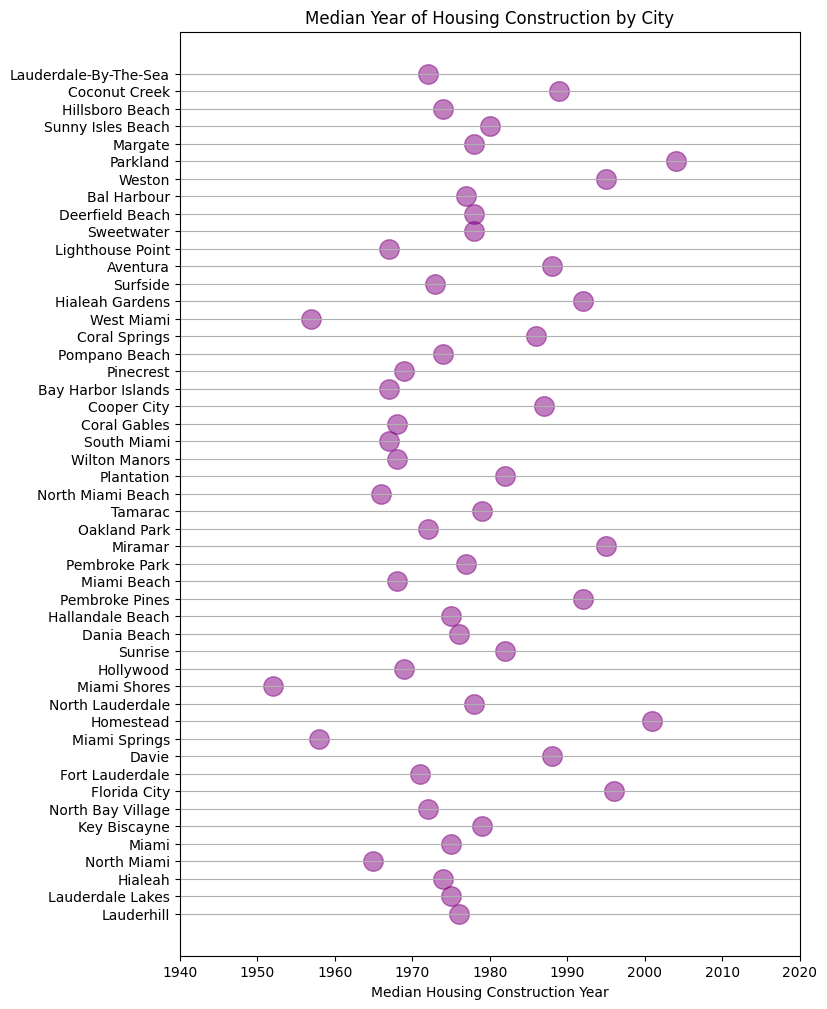

In [468]:
# Define the x and y data
x_data = df['HMY']
y_data = df['damagedCity']
bubble_sizes = df['HMY']/100  # Use the same data for bubble sizes

# Define the colors for the bubbles (optional)
colors = ['purple']

# Create the plot and set the x-axis limits
fig, ax = plt.subplots(figsize=(8, 12))
ax.set_xlim([1940, 2020])

# Add the bubbles to the plot
for i in range(len(x_data)):
    ax.scatter(x_data[i], y_data[i], s=bubble_sizes[i]*10, alpha=0.5, c=colors[i%len(colors)])

# Set the y-axis labels
ax.set_yticks(range(len(y_data)))
ax.set_yticklabels(y_data)

# Set the x-axis label
ax.set_xlabel('Median Housing Construction Year')
ax.grid(axis='y')

# Add a title to the plot
plt.title('Median Year of Housing Construction by City')

# Show the plot
plt.show()

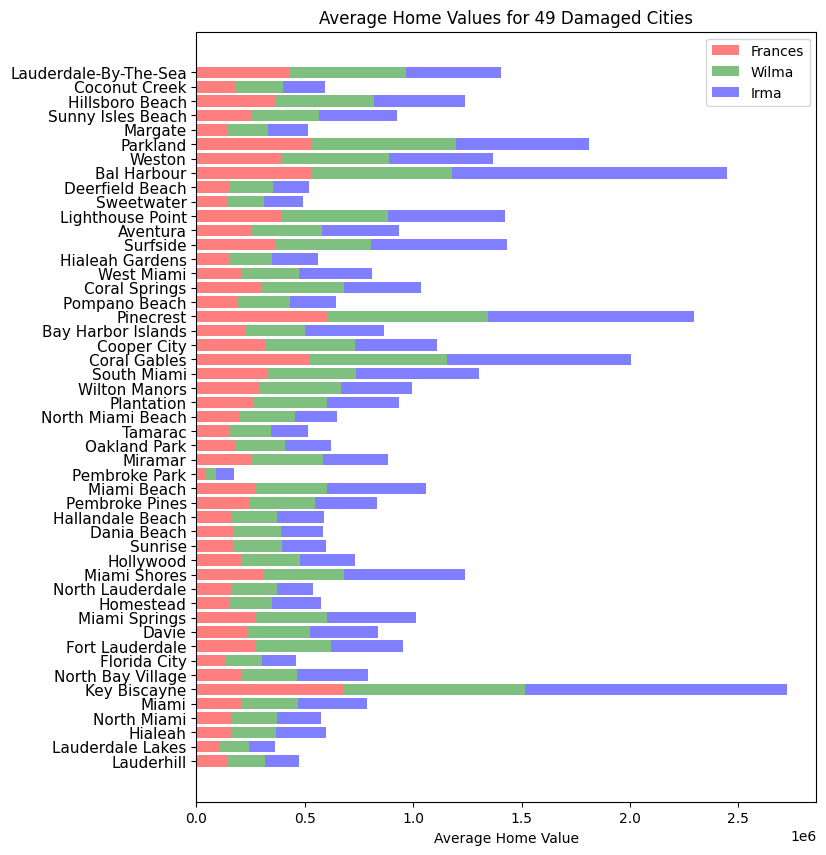